Computação Simbólica
====================

SymPy
-----

Nesta seção, apresentamos algumas funcionalidades básicas da biblioteca SymPy (SYMbolic Python). Em contraste com a computação numérica (envolvendo números), no cálculo simbólico estamos processando e transformando variáveis genéricas.

A home page do SymPy é <http://sympy.org/> e fornece a documentação completa (e atualizada) para esta biblioteca.

A seguir apresentamos uma lista de documentação para a biblioteca SymPy:

- [Physics Module](http://docs.sympy.org/latest/modules/physics/index.html)
  - [Classical Mechanics](http://docs.sympy.org/0.7.6/modules/physics/mechanics/index.html)
  - [Quantum Mechanics](http://docs.sympy.org/latest/modules/physics/quantum/index.html])
  - [Optics Module](http://docs.sympy.org/latest/modules/physics/optics/index.html)
- [SymPy Papers](https://github.com/sympy/sympy/wiki/SymPy-Papers)
- [Scipy 2016 tutorial](https://github.com/sympy/scipy-2016-tutorial)
- [SymPy Git](https://github.com/sympy)
- [SymPy TUTORIAL for the First Course in Applied Differential Equations](http://www.cfm.brown.edu/people/dobrush/am33/SymPy/index.html)


O cálculo simbólico é muito mais lento em comparação com as operações em ponto flutuante (veja por exemplo [cálculo simbólico para decimais](13-numeric-computation.ipynb#Simbólico-cálculo)) e, portanto, geralmente não é usado para simulação direta. No entanto, é uma ferramenta poderosa para apoiar a preparação de código e trabalho simbólico. Ocasionalmente, usamos operações simbólicas em simulações para elaborar o código numérico mais eficiente, antes que seja executado.


### Saída

Antes de começar a usar o sympy, chamaremos `init_printing`. Isso diz ao sympy para exibir expressões em um formato mais agradável.


In [1]:
import sympy
sympy.init_printing()

In [2]:
dir(sympy)

['Abs',
 'AccumBounds',
 'Add',
 'Adjoint',
 'AlgebraicField',
 'AlgebraicNumber',
 'And',
 'AppliedPredicate',
 'Array',
 'AssumptionsContext',
 'Atom',
 'AtomicExpr',
 'BasePolynomialError',
 'Basic',
 'BlockDiagMatrix',
 'BlockMatrix',
 'C',
 'CC',
 'CRootOf',
 'Catalan',
 'Chi',
 'Ci',
 'Circle',
 'ClassRegistry',
 'CoercionFailed',
 'Complement',
 'ComplexField',
 'ComplexRegion',
 'ComplexRootOf',
 'ComputationFailed',
 'ConditionSet',
 'Contains',
 'CosineTransform',
 'Curve',
 'DeferredVector',
 'DenseNDimArray',
 'Derivative',
 'Determinant',
 'DiagonalMatrix',
 'DiagonalOf',
 'Dict',
 'DiracDelta',
 'Domain',
 'DomainError',
 'DotProduct',
 'Dummy',
 'E',
 'E1',
 'EPath',
 'EX',
 'Ei',
 'Eijk',
 'Ellipse',
 'EmptySequence',
 'EmptySet',
 'Eq',
 'Equality',
 'Equivalent',
 'EulerGamma',
 'EvaluationFailed',
 'ExactQuotientFailed',
 'Expr',
 'ExpressionDomain',
 'ExtraneousFactors',
 'FF',
 'FF_gmpy',
 'FF_python',
 'FU',
 'FallingFactorial',
 'FiniteField',
 'FiniteSet',
 'Fla

### Simbolos


Antes de podermos realizar quaisquer operações simbólicas, precisamos criar variáveis simbólicas usando a função `Symbol` do SymPy:

In [3]:
from sympy import Symbol
x = Symbol('x')
type(x)

sympy.core.symbol.Symbol

In [3]:
y = Symbol('y')
2 * x - x

In [4]:
x + y + x + 10*y

In [5]:
y + x - y + 10

Podemos abreviar a criação de várias variáveis simbólicas usando a função `symbols`. Por exemplo, para criar as variáveis simbólicas `x`,` y` e `z`, podemos usar

In [4]:
import sympy
x, y, z = sympy.symbols('x,y,z')
x + 2*y + 3*z - x

Assim que concluímos a manipulação de termos, às vezes gostamos de inserir números para variáveis. Isso pode ser feito usando o método `subs`.

In [7]:
from sympy import symbols
x, y = symbols('x,y')
x + 2*y

In [8]:
x + 2*y.subs(x, 10)

In [9]:
(x + 2*y).subs(x, 10)

In [10]:
(x + 2*y).subs(x, 10).subs(y, 3)

In [11]:
(x + 2*y).subs({x:10, y:3})

Também podemos substituir uma variável simbólica por outra, como neste exemplo, onde `y` é substituído por` x` antes de substituir `x` pelo número` 2`.

In [12]:
myterm = 3*x + y**2
myterm

In [13]:
myterm.subs(x, y)

In [14]:
myterm.subs(x, y).subs(y, 2)

Deste ponto em diante, alguns dos fragmentos de código e exemplos que apresentamos assumirão que os símbolos requeridos já foram definidos. Se você tentar um exemplo e SymPy fornecer uma mensagem como `NameError: name ’x’ is not defined` é provavelmente porque você precisa definir o símbolo usando um dos métodos acima.

### isympy
 
O executável `isympy` é um invólucro em torno de ipython que cria as variáveis simbólicas (reais) `x`, `y` e `z`, as variáveis inteiras simbólicas `k`,` m` e `n` e as variáveis de função simbólicas `F`,` g` e `h` e importa todos os objetos de mais alto nível do SymPy.

Isso é conveniente para descobrir novos recursos ou experimentar interativamente


    $> isympy
    Python 2.6.5 console for SymPy 0.6.7

    These commands were executed:
    >>> from __future__ import division
    >>> from sympy import *
    >>> x, y, z = symbols('xyz')
    >>> k, m, n = symbols('kmn', integer=True)
    >>> f, g, h = map(Function, 'fgh')

    Documentation can be found at http://sympy.org/

    In [1]: 

### Tipos Numéricos


SymPy possui os tipos numéricos `Rational` e` RealNumber`. A classe Racional representa um número racional como um par de dois inteiros: o numerador e o denominador, então `Rational(1,2)`  representa `1/2`, `Rational(5,2)` representa `5/2` e assim por diante.

In [16]:
from sympy import Rational

In [17]:
a = Rational(1, 10)
a

In [18]:
b = Rational(45, 67)
b

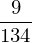

In [19]:
a * b

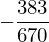

In [20]:
a - b

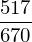

In [21]:
a + b

Observe que a classe Rational funciona com expressões racionais *exatamente*. Isto está em contraste com o tipo de dados `float` padrão do Python que usa a representação de ponto flutuante para números *aproximados* (racionais).

Podemos converter o tipo `sympy.Rational` em uma variável de ponto flutuante Python usando `float` ou o método `evalf` do objeto Rational. O método `evalf` pode ter um argumento que especifica quantos dígitos devem ser calculados para a aproximação de ponto flutuante (nem todos podem ser usados pelo tipo de ponto flutuante do Python, claro).

In [22]:
c = Rational(2, 3)
c

In [23]:
float(c)

In [24]:
c.evalf()

In [25]:
c.evalf(50)

### Diferenciação e Integração 

O SymPy é capaz de realizar diferenciação e integração de muitas funções:

In [7]:
from sympy import Symbol, exp, sin, sqrt, diff
x = Symbol('x')
y = Symbol('y')
diff(sin(x), x)

In [8]:
diff(sin(x), y)

In [12]:
diff(10 + 3*x**2 + 4*y**2 + 10*x**2 + x**9, x)

In [29]:
diff(_,x)

In [5]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x,2)

NameError: name 'diff' is not defined

In [31]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, y)

In [32]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1)

In [33]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1.5)

In [34]:
diff(exp(x), x)

In [36]:
diff(exp(-x ** 2 / 2), x)

A função `diff()` do SymPy toma um mínimo de dois argumentos: a função a ser diferenciada e a variável com respeito à qual a diferenciação é realizada. Derivados mais altos podem ser calculados especificando variáveis adicionais, ou adicionando um argumento inteiro opcional:

In [37]:
diff(3*x**4, x)

In [38]:
diff(3*x**4, x, x, x)

In [39]:
diff(3*x**4, x, 3)

In [40]:
diff(3*x**4*y**7, x, 2, y, 2)

In [41]:
diff(diff(3*x**4*y**7, x, x), y, y)

Às vezes, SymPy pode retornar um resultado em uma forma desconhecida. Se, por exemplo, você desejar usar o SymPy para verificar se você diferenciou algo corretamente, uma técnica que pode ser útil é subtrair o resultado do SymPy do resultado e verificar se a resposta é zero.

Tomando o exemplo simples de uma função de base radial multiquadric, $\phi(r) = \sqrt{r^2 + \sigma^ 2}$ com $r = \sqrt{x^2 + y^ 2}$ e *σ* uma constante, podemos verificar que a primeira derivada em *x* é $\partial\phi/ \partial x = x /\sqrt{r^2 + \sigma^2}$.

Neste exemplo, pedimos primeiro a SymPy para imprimir a derivada. Veja que ele é impresso em uma forma diferente para o nosso julgamento derivado, mas a subtração verifica que eles são idênticos:

In [46]:
r = sqrt(x**2 + y**2)
sigma = Symbol('σ')
def phi(x,y,sigma):
    return sqrt(x**2 + y**2 + sigma**2)

mydfdx= x / sqrt(r**2 + sigma**2)
print(diff(phi(x, y, sigma), x))

x/sqrt(x**2 + y**2 + σ**2)


In [45]:
print(mydfdx - diff(phi(x, y, sigma), x))

0


Aqui é trivial dizer que as expressões são idênticas sem a ajuda de SymPy, mas em exemplos mais complicados pode haver muitos mais termos e nesses casos seria cada vez mais difícil, demorado e propenso a erros para tentar reorganizar nossa derivada de teste e a resposta de SymPy na mesma forma. É nesses casos que esta técnica de subtração é de maior utilidade.

Integração usa uma sintaxe semelhante. Para o caso indefinido, especifique a função e a variável com relação à qual a integração é realizada:

In [50]:
from sympy import integrate
integrate(x**2, x)

In [51]:
integrate(x**2, y)

In [52]:
integrate(sin(x), y)

In [53]:
integrate(sin(x), x)

In [55]:
integrate(-x*exp(-x**2/2), x)

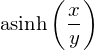

In [56]:
integrate(1/sqrt(x**2+y**2),x)

Podemos calcular integrais definidas fornecendo `integrate ()` com uma tupla contendo a variável de interesse, os limites inferior e superior. Se várias variáveis são especificadas, múltipla integração é realizada. Quando o SymPy retorna um resultado na classe `Rational`, é possível avaliá-lo para uma representação de ponto flutuante com qualquer precisão desejada (ver [tipos numéricos](#Numeric-types)).


In [57]:
integrate(x*2, (x, 0, 1))

In [58]:
integrate(x**2, x)

In [59]:
integrate(x**2, x, x)

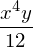

In [60]:
integrate(x**2, x, x, y)

In [61]:
integrate(x**2, (x, 0, 2))

In [62]:
integrate(x**2, (x, 0, 2), (x, 0, 2), (y, 0, 1))

In [63]:
float(integrate(x**2, (x, 0, 2)))

In [64]:
type(integrate(x**2, (x, 0, 2)))

sympy.core.numbers.Rational

In [65]:
result_rational=integrate(x**2, (x, 0, 2))
result_rational.evalf()

In [66]:
result_rational.evalf(50)

### Equações diferenciais ordinárias (EDO)

SymPy tem suporte incorporado para resolver vários tipos de equação diferencial ordinária através de seu comando `dsolve`. Precisamos configurar a EDO e passá-la como o primeiro argumento, `eq`. O segundo argumento é a função `f(x)` para resolver. Um terceiro argumento opcional, `hint`, influencia o método que `dsolve` usa: alguns métodos são mais adequados para certas classes de EDOs, ou expressam a solução mais simples do que outros.

Para configurar o *solver* da EDO, precisamos de uma maneira de se referir à função desconhecida para a qual estamos resolvendo, bem como suas derivadas. As classes `Function` e` Derivative` facilitam isto:


In [68]:
from sympy import Symbol, dsolve, Function, Derivative, Eq
y = Function("y")
x = Symbol('x')
y_ = Derivative(y(x), x)
dsolve(y_ + 5*y(x), y(x))

Observe como `dsolve` introduziu uma constante de integração,` C1`. Ele irá introduzir quantas constantes forem necessárias, e todos eles serão chamados `Cn`, onde` n` é um inteiro. Observe também que o primeiro argumento para `dsolve` é considerado igual a zero, a menos que usemos a função `Eq()` para especificar o contrário:

In [69]:
dsolve(y_ + 5*y(x), y(x))

In [70]:
dsolve(Eq(y_ + 5*y(x), 0), y(x))

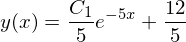

In [71]:
dsolve(Eq(y_ + 5*y(x), 12), y(x))

Os resultados de `dsolve` são uma instância da classe `Equality`. Isto tem consequências quando queremos avaliar numericamente a função e usar o resultado em outro lugar (*por exemplo* se queremos plotar *y*(*x*) contra *x*), porque mesmo depois de usar `subs()` e `evalf()`, ainda temos um `Equality`, não qualquer tipo de escalar. A maneira de avaliar a função para um número é através do atributo `rhs` da `Equality`.

Note-se que, aqui, usamos `z` para armazenar o `Equality` retornado por `dsolve`, mesmo que seja uma expressão para uma função chamada `y(x)`, para enfatizar a distinção entre o `Equality` e os dados que ela contém.

In [72]:
z = dsolve(y_ + 5*y(x), y(x))
z

In [73]:
type(z)

sympy.core.relational.Equality

In [74]:
z.rhs

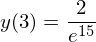

In [75]:
C1=Symbol('C1')
y3 = z.subs({C1:2, x:3})
y3

In [76]:
y3.evalf(10)

In [77]:
y3.rhs

In [78]:
y3.rhs.evalf(10)

In [79]:
z.rhs.subs({C1:2, x:4}).evalf(10)

In [80]:
z.rhs.subs({C1:2, x:5}).evalf(10)

In [ ]:
type(z.rhs.subs({C1:2, x:5}).evalf(10))

Às vezes, `dsolve` pode retornar uma solução muito geral. Um exemplo é quando existe a possibilidade de alguns coeficientes serem complexos. Se sabemos que, por exemplo, eles são sempre reais e positivos, podemos fornecer `dsolve` essas informações para evitar que a solução se torne desnecessariamente complicada:

In [84]:
from sympy import *
a, x = symbols('a,x')
f = Function('f')
dsolve(Derivative(f(x), x, 2) + a**4*f(x), f(x))

In [82]:
a=Symbol('a',real=True,positive=True)
dsolve(Derivative(f(x), x, 2)+a**4*f(x), f(x))

ODE:


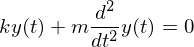

Generic solution:


Solution with initial conditions:


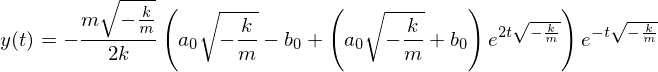

In [83]:
from IPython.display import display
import sympy as sy

sy.init_printing()  # LaTeX-like pretty printing for IPython

t = sy.Symbol("t", real=True)
m, k = sy.symbols('m k', real=True)  # gives C_1 Exp() + C_2 Exp() solution
# m, k = sy.symbols('m k', positive=True)  # gives C_1 sin() + C_2 cos() sol.
a0, b0 = sy.symbols('a0, b0', real=True)
y = sy.Function('y')

Eq1 = sy.Eq(m*sy.diff(y(t), t, 2) + k*y(t))
print("ODE:")
display(Eq1)

print("Generic solution:")
y_sl0 = sy.dsolve(Eq1, y(t)).rhs  # take only right hand side
display(sy.Eq(y(t), y_sl0))

# Initial conditions:
cnd0 = sy.Eq(y_sl0.subs(t, 0), a0)  # y(0) = a0
cnd1 = sy.Eq(y_sl0.diff(t).subs(t, 0), b0)  # y'(0) = b0

#  Solve for C1, C2:
C1, C2 = sy.symbols("C1, C2")  # generic constants
C1C2_sl = sy.solve([cnd0, cnd1], (C1, C2))

# Substitute back into solution:
y_sl1 = sy.simplify(y_sl0.subs(C1C2_sl))
print("Solution with initial conditions:")
display(sy.Eq(y(t), y_sl1))

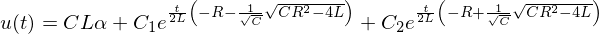

In [85]:
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
t = symbols("t")
u = symbols("u",cls=Function)
R, L, C, E_0, alpha = symbols("R L C E_0 alpha",positive=True)

eqRLC = Eq( L*C*u(t).diff(t,t) + R*C*u(t).diff(t) + u(t),E_0)
dsolve(eqRLC)

eqRLC_2 = Eq( u(t).diff(t,t) + R /L*u(t).diff(t) + 1/(L*C)*u(t),E_0/(L*C))
dsolve(eqRLC_2)

eqRLC3 = Eq( u(t).diff(t,t) + R /L*u(t).diff(t) + 1/(L*C)*u(t), alpha)
dsolve(eqRLC3)

### Expansões e plotagem da série

É possível expandir muitas expressões SymPy como série Taylor. O método `series` torna isso simples. No mínimo, devemos especificar a expressão e a variável em que ela será expandida. Opcionalmente, também podemos especificar o ponto em torno do qual será expandida, o número máximo de termos e a direção da expansão (tente `help (Basic.series)` para obter mais informações).


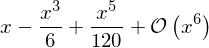

In [86]:
from sympy import *
x = Symbol('x')
sin(x).series(x, 0)

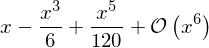

In [100]:
series(sin(x), x, 0)

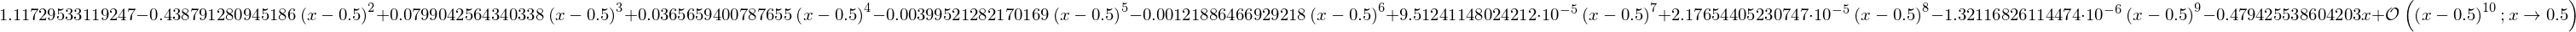

In [93]:
cos(x).series(x, 0.5, 10)

Em alguns casos, especialmente para avaliação numérica e plotagem dos resultados, é necessário remover o termo `O(n)`:

In [94]:
cos(x).series(x, 0.5, 10).removeO()

O SymPy fornece duas funções de plotagem embutidas, `Plot()` do módulo `sympy.plotting` e `plot` de `sympy.mpmath.visualization`. No momento da escrita, essas funções não têm a capacidade de adicionar uma chave para o enredo, o que significa que eles são inadequados para a maioria de nossas necessidades. Se você deseja usá-los, no entanto, seu texto de ajuda, o `help()` é útil.

Para a maioria de nossos propósitos, Matplotlib deve ser a ferramenta de planejamento de escolha. Os detalhes estão no capítulo \[cha:visualisingdata\]. Aqui nós fornecemos apenas um exemplo de como traçar os resultados de uma computação SymPy.


In [96]:
%matplotlib inline

In [97]:
from sympy import sin,series,Symbol
import pylab
x = Symbol('x')
s10 = sin(x).series(x,0,10).removeO()
s20 = sin(x).series(x,0,20).removeO()
s = sin(x)
xx = []
y10 = []
y20 = []
y = []
for i in range(1000):
  xx.append(i / 100.0)
  y10.append(float(s10.subs({x:i/100.0})))
  y20.append(float(s20.subs({x:i/100.0})))
  y.append(float(s.subs({x:i/100.0})))

pylab.figure()

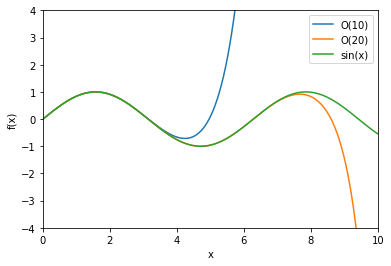

In [98]:
pylab.plot(xx, y10, label='O(10)')
pylab.plot(xx, y20, label='O(20)')
pylab.plot(xx, y, label='sin(x)')

pylab.axis([0, 10, -4, 4])
pylab.xlabel('x')
pylab.ylabel('f(x)')

pylab.legend()

### Equações lineares e inversão matricial

O SymPy possui uma classe `Matrix` e funções associadas que permitem a solução simbólica de sistemas de equações lineares (e, obviamente, podemos obter respostas numéricas com `subs()` e `evalf()`)). Consideraremos o exemplo do seguinte par simples de equações lineares:

$$\begin{aligned}
3x + 7y&= 12z\\
4x - 2y&= 5z\end{aligned}$$

Podemos escrever esse sistema na forma $A\vec{x}=\vec{b}$ (multiplique *A* por $\vec{x}$ se você quiser verificar se recuperamos as equações originais), onde

$$A=\left(\begin{array}{cc}
3 & 7\\
4 & -2 \end{array} \right),\qquad
\vec{x}=\left(\begin{array}{c}
x\\
y \end{array}\right),\qquad
\vec{b}=\left( \begin{array}{c}
12z\\
5z \end{array}\right).$$

Aqui incluímos um símbolo, *z*, no lado direito para demonstrar que os símbolos serão propagados para a solução. Em muitos casos teríamos *z* = 1, mas ainda pode haver vantagem em usar o SymPy sobre um solucionador numérico, mesmo quando a solução não contém símbolos por causa de sua capacidade de retornar frações exatas em vez de aproximar `float`s.

Uma estratégia para resolver $\vec{x}$ é inverter a matriz *A* e pré-multiplicar, * ie * $A^{-1}A\vec{x}=\vec{x} = A^{-1} \vec{b}$. A classe `Matrix` do SymPy tem um método `inv()`que nos permite encontrar o inverso, e `*` executa a multiplicação matricial para nós, quando apropriado:

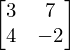

In [104]:
from sympy import symbols,Matrix
x, y, z = symbols('x,y,z')
A = Matrix(([3, 7], [4, -2]))
A

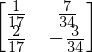

In [105]:
A.inv()

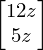

In [106]:
b = Matrix(( 12*z,5*z  ))
b

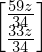

In [107]:
x = A.inv()*b
x

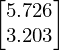

In [108]:
x.subs({z:3.3}).evalf(4)

In [109]:
type(x)

sympy.matrices.dense.MutableDenseMatrix

Um método alternativo para resolver o mesmo problema é construir o sistema como uma matriz em forma aumentada; que é a forma obtida juntando as colunas de (no nosso exemplo) *A* e $\vec{b}$. A matriz aumentada é [1]:

$$
\begin{equation}
(A|\vec{b})=\left(\begin{array}{cc|c}
3 & 7 & 12z\\
4 & -2 & 5z\end{array} \right),
\end{equation}
$$

e como antes construímos isto como um objeto `Matrix` do SymPy, mas neste caso passamos para a função `solve_linear_system()`:

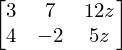

In [110]:
from sympy import Matrix, symbols, solve_linear_system
x, y, z = symbols('x,y,z')
system = Matrix(([3, 7, 12*z],[4, -2, 5*z]))
system

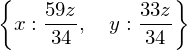

In [111]:
sol = solve_linear_system(system,x,y)
sol

In [112]:
type(sol)

dict

In [114]:
for k in sol.keys():
    print(k,'=',sol[k].subs({z:3.3}).evalf(4))

x = 5.726
y = 3.203


Uma terceira opção é o método `solve()`, cujos argumentos incluem as equações simbólicas individuais, ao invés de quaisquer matrizes. Como `dsolve()` (ver [ODEs](#Ordinary-differential-equations)), `solve()` espera expressões que assumirá iguais a zero, ou `Equality`, que podemos criar convenientemente com `Eq()`:

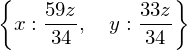

In [115]:
from sympy import symbols,solve,Eq
x, y, z = symbols('x,y,z')
solve((Eq(3*x+7*y,12*z), Eq(4*x-2*y,5*z)), x, y)

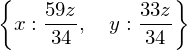

In [116]:
solve((3*x+7*y-12*z, 4*x-2*y-5*z), x, y)

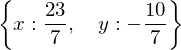

In [123]:
solve((3*x+2*y-7, 2*x-y-8), x, y)

Para mais informações, veja `help(solve)` e `help(solve_linear_system)`.

### Equações não lineares

Vamos resolver uma equação simples tal como:
$x = x^2$. Há obviamente duas soluções: *x* = 0 e *x* = 1. Como podemos pedir a Sympy que as calcule para nós?

In [124]:
import sympy
x, y, z = sympy.symbols('x, y, z')        # cria os simbolos x, y e z
eq = x - x ** 2                           # define a equação

In [125]:
sympy.solve(eq, x)                        # resolve eq = 0

A função `solve()` espera uma expressão que, como pretende ser resolvida, para que ela seja avaliada como sendo zero. Para o nosso exemplo, reescrevemos

*x* = *x*<sup>2</sup>
 as
*x* − *x*<sup>2</sup> = 0
e depois passamos para a função de `solve`.

Vamos repetir a mesma equação:
*x* = *x*<sup>3</sup>
e resolver

In [130]:
eq = x - x ** 3                           # define a equação
sympy.solve(eq, x)                        # resolve eq = 0

# Gerando resultado em LaTeX

Para gerar o resultado de uma expressão em LaTeX use a função `sympy.printing.latex(arg)` onde `arq` deve ser um *symbol* 

In [131]:
y=series(sin(x), x, 0)
sympy.printing.latex(y)

'x - \\frac{x^{3}}{6} + \\frac{x^{5}}{120} + \\mathcal{O}\\left(x^{6}\\right)'

### Saída: Interface LaTeX e uma impressão bonita

Como é o caso de muitos sistemas de álgebra computacional, o SymPy tem a capacidade de formatar sua saída como código LaTeX, para facilitar a inclusão em documentos.

No início deste texto, chamamos:


```python
sympy.init_printing()
```

Sympy detectou que estava em Jupyter, e permitiu saída de látex. O Jupyter Notebook suporta (alguns) Latex, então isso nos dá a saída bem formatada acima.

Também podemos ver a saída de texto simples do Sympy, e o código de látex cru que ele cria:


In [132]:
print(series(1/(x+y), y, 0, 3))

1/(2*x - x**3/6 + x**5/120 + O(x**6))


In [133]:
print(latex(series(1/(x+y), y, 0, 3)))

\frac{1}{2 x - \frac{x^{3}}{6} + \frac{x^{5}}{120} + \mathcal{O}\left(x^{6}\right)}


In [134]:
print(latex(series(1/(x+y), y, 0, 3), mode='inline'))

$\frac{1}{2 x - x^{3} / 6 + x^{5} / 120 + \mathcal{O}\left(x^{6}\right)}$


Lembre-se de que no seu modo padrão, `latex()` envia um código que requer que o pacote `amsmath` seja carregado através do comando` \backslashusepackage{amsmath}` no preâmbulo do documento.

O SymPy também suporta uma rotina de saída "pretty print" (`pprint()`), que produz uma saída de texto com melhor formatação do que a rotina de impressão padrão, conforme ilustrado abaixo. Note características como os subscritos para elementos de matriz cujos nomes são da forma `T_n`, a constante em itálico *e*, pontos verticalmente centrados para a multiplicação e as bordas e frações bem formadas da matriz.

<img src = "sympy/sympy2.png" alt = "Saída bem formatada do pprint()." style = "width:80.0%" />

Finalmente, o SymPy oferece `preview()`, que exibe a saída renderizada na tela (verifique `help(preview)` para detalhes).


### Geração automática de código Fortran  ou C 

Um ponto forte de muitas bibliotecas simbólicas é que elas podem converter as expressões simbólicas em um código fonte Fortran (ou outro código, como o C) que podem ser posteriormente compiladas para alta velocidade de execução. Aqui está um exemplo que demonstra isso:

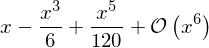

In [135]:
from sympy import *                                                                                    
from sympy.utilities.codegen import codegen                                                                            
x = Symbol('x')                                                                                                          
sin(x).series(x, 0, 6)

In [136]:
print(codegen(("taylor_seno",sin(x).series(x,0,6)), language='F95')[0][1])

!******************************************************************************
!*                       Code generated with sympy 1.0                        *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function taylor_seno(x)
implicit none
REAL*8, intent(in) :: x

REAL*8 :: O(x**6)
taylor_seno = x - 1.0d0/6.0d0*x**3 + (1.0d0/120.0d0)*x**5 + O(x**6)

end function



Para obter o mesmo código em C, faz-se 

In [137]:
print(codegen(("taylor_seno",sin(x).series(x,0,6)), language='C')[0][1])

/******************************************************************************
 *                       Code generated with sympy 1.0                        *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "taylor_seno.h"
#include <math.h>

double taylor_seno(double x) {

   double taylor_seno_result;
   taylor_seno_result = x - 1.0L/6.0L*pow(x, 3) + (1.0L/120.0L)*pow(x, 5) + O(x**6);
   return taylor_seno_result;

}



Considere o seguinte exemplo:

In [138]:
from sympy import *
from sympy.utilities.codegen import codegen
A, B, C = symbols('A B C', cls=IndexedBase)
m, n = symbols('m n', integer=True)
i = Idx('i', m)
j = Idx('j', n)
expr = Eq(C[i], A[i, j]*B[j])
result = codegen(('FuncaoMat', expr), 'F95', 'FuncaoMat')
print (result[0][1])

!******************************************************************************
!*                       Code generated with sympy 1.0                        *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

subroutine FuncaoMat(A, B, m, n, C)
implicit none
INTEGER*4, intent(in) :: m
INTEGER*4, intent(in) :: n
REAL*8, intent(in), dimension(1:m, 1:n) :: A
REAL*8, intent(in), dimension(1:n) :: B
REAL*8, intent(out), dimension(1:m) :: C
INTEGER*4 :: i
INTEGER*4 :: j

do i = 1, m
   C(i) = 0
end do
do i = 1, m
   do j = 1, n
      C(i) = B(j)*A(i, j) + C(i)
   end do
end do

end subroutine



Ferramentas Relacionadas 
-------------

Vale a pena notar que a iniciativa SAGE está tentando "criar uma alternativa livre e viável para Magma, Maple, Mathematica e Matlab" e inclui a biblioteca SymPy entre muitos outros. Suas capacidades simbólicas são mais poderosas do que SymPy e SAGE, mas os recursos do SymPy já vão cobrir muitas das necessidades que surgem na ciência e na engenharia. SAGE inclui o sistema de álgebra computador Maxima, que também está disponível em <http://maxima.sourceforge.net/>.
